In [5]:
!pip install findspark

  Using cached findspark-2.0.1-py2.py3-none-any.whl.metadata (352 bytes)
Using cached findspark-2.0.1-py2.py3-none-any.whl (4.4 kB)


In [7]:
#Tugas 1
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("SQL_1").getOrCreate()

data = [
    ('Assep', 23, 'M', 3000, 1),
    ('Rayfal', 20, 'M', 4100, 2),
    ('Mayza', 37, 'F', 1200, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()

+------+---+------+------+------+
|  Name|Age|Gender|Salary|DeptId|
+------+---+------+------+------+
| Assep| 23|     M|  3000|     1|
|Rayfal| 20|     M|  4100|     2|
| Mayza| 37|     F|  1200|     1|
+------+---+------+------+------+

+------+---+
|  Name|Age|
+------+---+
|Rayfal| 20|
+------+---+

+------------------+
|       avg(Salary)|
+------------------+
|2766.6666666666665|
+------------------+



In [8]:
#Tugas 2
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("SQL_1").getOrCreate()

data = [
    ('Assep', 23, 'M', 3000, 1),
    ('Rayfal', 20, 'M', 4100, 2),
    ('Mayza', 37, 'F', 1200, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql("""
SELECT Gender, Age, SUM(Salary) AS TotalSalary
FROM employees
GROUP BY Gender, Age
ORDER BY Age
""").show()

+------+---+-----------+
|Gender|Age|TotalSalary|
+------+---+-----------+
|     M| 20|       4100|
|     M| 23|       3000|
|     F| 37|       1200|
+------+---+-----------+



In [10]:
#Tugas 2.1: rata-rata gaji
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("SQL_1").getOrCreate()

data = [
    ('Assep', 23, 'M', 3000, 1),
    ('Rayfal', 20, 'M', 4100, 2),
    ('Mayza', 37, 'F', 1200, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql("""
SELECT DeptId, AVG(Salary) AS AvgSalary
FROM employees
GROUP BY DeptId
""").show()

+------+---------+
|DeptId|AvgSalary|
+------+---------+
|     1|   2100.0|
|     2|   4100.0|
+------+---------+



In [9]:
#Tugas 2.2: Karyawan dengan gaji di atas rata-rata
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("SQL_1").getOrCreate()

data = [
    ('Assep', 23, 'M', 3000, 1),
    ('Rayfal', 20, 'M', 4100, 2),
    ('Mayza', 37, 'F', 1200, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql("""
SELECT Name, Gender, Salary
FROM employees e
WHERE Salary > (
    SELECT AVG(Salary) FROM employees WHERE Gender = e.Gender
)
""").show()

+------+------+------+
|  Name|Gender|Salary|
+------+------+------+
|Rayfal|     M|  4100|
+------+------+------+



In [11]:
#Tugas 2.3: Ranking gaji berdasarkan dept.
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("SQL_1").getOrCreate()

data = [
    ('Assep', 23, 'M', 3000, 1),
    ('Rayfal', 20, 'M', 4100, 2),
    ('Mayza', 37, 'F', 1200, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql("""
SELECT Name, DeptId, Salary,
       RANK() OVER(PARTITION BY DeptId ORDER BY Salary DESC) AS Rank
FROM employees
""").show()

+------+------+------+----+
|  Name|DeptId|Salary|Rank|
+------+------+------+----+
| Assep|     1|  3000|   1|
| Mayza|     1|  1200|   2|
|Rayfal|     2|  4100|   1|
+------+------+------+----+



In [12]:
#Tugas 3
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("SQL_1").getOrCreate()

data = [
    ('Assep', 23, 'M', 3000, 1),
    ('Rayfal', 20, 'M', 4100, 2),
    ('Mayza', 37, 'F', 1200, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql("""
SELECT Name, Age, Salary,
       ROW_NUMBER() OVER(PARTITION BY Age ORDER BY Salary DESC) AS Rank
FROM employees
""").show()

+------+---+------+----+
|  Name|Age|Salary|Rank|
+------+---+------+----+
|Rayfal| 20|  4100|   1|
| Assep| 23|  3000|   1|
| Mayza| 37|  1200|   1|
+------+---+------+----+



In [15]:
#Tugas 4
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

employees = spark.createDataFrame([
  ('Gatot', 23, 'M', 3000, 1),
  ('Pendi', 28, 'M', 4100, 2),
  ('Biyyu', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
  (1, 'HR'),
  (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
  (1, 'Project A'),
  (2, 'Project B')
], ['DeptId', 'ProjectName'])

employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()

+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|Biyyu| 23|       HR|  Project A|
|Gatot| 23|       HR|  Project A|
|Pendi| 28|Marketing|  Project B|
+-----+---+---------+-----------+



In [17]:
#Tugas 5
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

employees = spark.createDataFrame([
  ('Gatot', 23, 'M', 3000, 1),
  ('Pendi', 28, 'M', 4100, 2),
  ('Biyyu', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
  (1, 'HR'),
  (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
  (1, 'Project A'),
  (2, 'Project B')
], ['DeptId', 'ProjectName'])

employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

spark.sql("""
SELECT 
    e.Name,
    d.DeptName,
    e.Salary,
    ROUND(AVG(e.Salary) OVER (PARTITION BY d.DeptName), 2) AS AvgSalaryDept,
    RANK() OVER (PARTITION BY d.DeptName ORDER BY e.Salary DESC) AS RankInDept
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
ORDER BY d.DeptName, RankInDept
""").show()

+-----+---------+------+-------------+----------+
| Name| DeptName|Salary|AvgSalaryDept|RankInDept|
+-----+---------+------+-------------+----------+
|Gatot|       HR|  3000|       2850.0|         1|
|Biyyu|       HR|  2700|       2850.0|         2|
|Pendi|Marketing|  4100|       4100.0|         1|
+-----+---------+------+-------------+----------+



In [20]:
#Tugas 6
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

employees = spark.createDataFrame([
  ('Gatot', 23, 'M', 3000, 1),
  ('Pendi', 28, 'M', 4100, 2),
  ('Biyyu', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
  (1, 'HR'),
  (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
  (1, 'Project A'),
  (2, 'Project B')
], ['DeptId', 'ProjectName'])

employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

spark.sql("""
SELECT 
    e.Name,
    d.DeptName,
    e.Age,
    e.Salary,
    ROUND(AVG(e.Salary) OVER (PARTITION BY d.DeptName ORDER BY e.Age ROWS BETWEEN 1 PRECEDING AND 1 FOLLOWING), 2) AS SalaryTrend
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
ORDER BY d.DeptName, e.Age
""").show()

+-----+---------+---+------+-----------+
| Name| DeptName|Age|Salary|SalaryTrend|
+-----+---------+---+------+-----------+
|Gatot|       HR| 23|  3000|     2850.0|
|Biyyu|       HR| 23|  2700|     2850.0|
|Pendi|Marketing| 28|  4100|     4100.0|
+-----+---------+---+------+-----------+



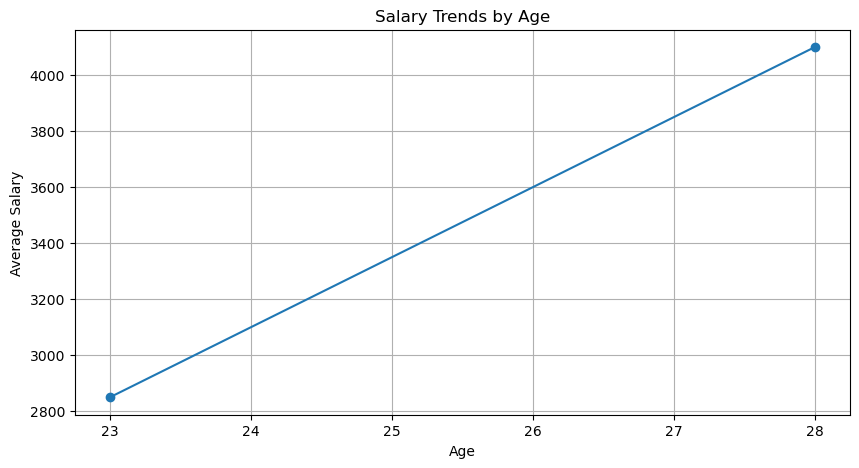

In [19]:
#Tugas 7
import matplotlib.pyplot as plt
import pandas as pd

salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()

25/10/25 11:31:00 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+----------+------------+---------------+
|Department|Total_Salary|Total_Employees|
+----------+------------+---------------+
|  Engineer|       20200|              3|
|   Manager|        9900|              1|
|  Security|        3000|              1|
+----------+------------+---------------+



Text(0.5, 1.0, 'Perbandingan Total Gaji per Departemen')

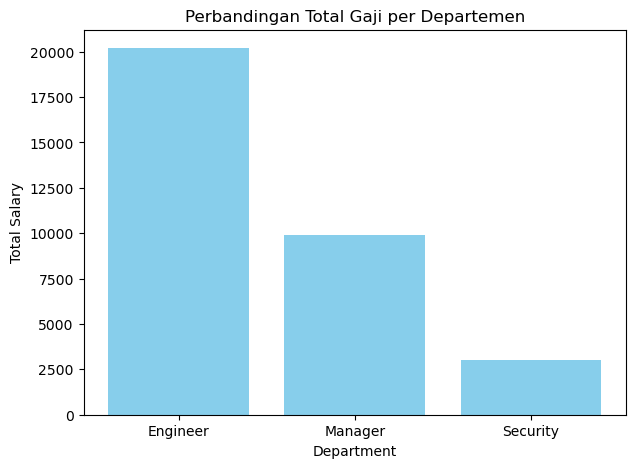

In [42]:
#Homework 1
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Homework1").getOrCreate()

data = [
    ('Pendi', 45, 'Security', 3000),
    ('Upi', 33, 'Engineer', 6000),
    ('Rosyid', 29, 'Engineer', 6700),
    ('Wahid', 38, 'Engineer', 7500),
    ('Fahmi', 25, 'Manager', 9900)
]

columns = ['Name', 'Age', 'Department', 'Salary']
df = spark.createDataFrame(data, columns)

df.createOrReplaceTempView("employees")

result = spark.sql("""
SELECT Department,
       SUM(Salary) AS Total_Salary,
       COUNT(*) AS Total_Employees
FROM employees
GROUP BY Department
ORDER BY Total_Salary DESC
""")

result.show()

chart = result.toPandas()
plt.figure(figsize=(7,5))
plt.bar(chart['Department'], chart['Total_Salary'], color='skyblue', label='Total Salary')
plt.xlabel("Department")
plt.ylabel("Total Salary")
plt.title("Perbandingan Total Gaji per Departemen")

25/10/25 11:31:33 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+----+---+----------+------+
|Name|Age|Department|Salary|
+----+---+----------+------+
+----+---+----------+------+



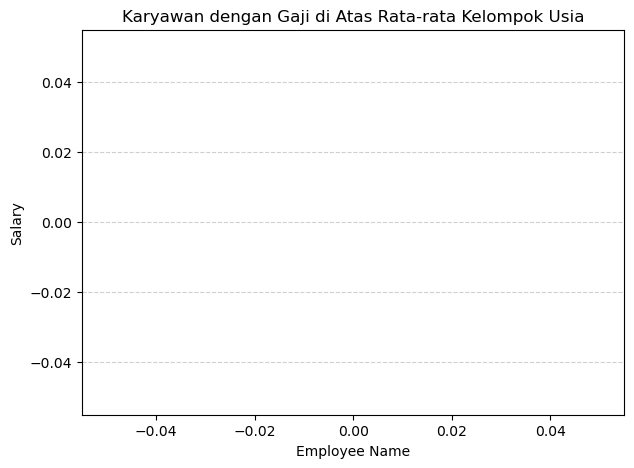

In [43]:
#Homework 2
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Homework2").getOrCreate()

data = [
    ('Pendi', 45, 'Security', 3000),
    ('Upi', 33, 'Engineer', 6000),
    ('Rosyid', 29, 'Engineer', 6700),
    ('Wahid', 38, 'Engineer', 7500),
    ('Fahmi', 25, 'Manager', 9900)
]

columns = ['Name', 'Age', 'Department', 'Salary']
df = spark.createDataFrame(data, columns)

df.createOrReplaceTempView("employees")

# Query untuk mencari karyawan dengan gaji di atas rata-rata kelompok usia (±2 tahun)
result = spark.sql("""
SELECT e.Name, e.Age, e.Department, e.Salary
FROM employees e
WHERE e.Salary > (
    SELECT AVG(Salary)
    FROM employees
    WHERE Age BETWEEN e.Age - 2 AND e.Age + 2
)
ORDER BY e.Age
""")

result.show()

chart = result.toPandas()
plt.figure(figsize=(7,5))
plt.bar(chart["Name"], chart["Salary"], color="orange")
plt.title("Karyawan dengan Gaji di Atas Rata-rata Kelompok Usia")
plt.ylabel("Salary")
plt.xlabel("Employee Name")
plt.grid(axis='y', linestyle='--', alpha=0.6)

+-----------+--------------+---------+-----------+
|   DeptName|TotalEmployees|AvgSalary|TotalSalary|
+-----------+--------------+---------+-----------+
|    Finance|            24|  4870.63|     116895|
|Engineering|            28|  4701.71|     131648|
|         HR|            37|  4646.19|     171909|
|    Manager|            31|  4539.71|     140731|
+-----------+--------------+---------+-----------+



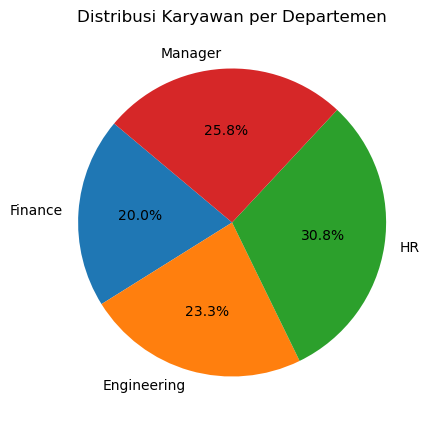

In [41]:
#Homework 3
import random
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Homework3").getOrCreate()

# Buat dataset besar
data = []
departments_data = [
    (1, 'Manager'),
    (2, 'Finance'),
    (3, 'HR'),
    (4, 'Engineering')
]

for i in range(120):
    name = f"Emp_{i+1}"
    age = random.randint(22, 55)
    gender = random.choice(['M', 'F'])
    salary = random.randint(2500, 7000)
    dept = random.choice([1, 2, 3, 4])
    data.append((name, age, gender, salary, dept))

employees_big = spark.createDataFrame(data, ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments_big = spark.createDataFrame(departments_data, ['DeptId', 'DeptName'])

employees_big.createOrReplaceTempView('employees_big')
departments_big.createOrReplaceTempView('departments_big')

result = spark.sql("""
SELECT d.DeptName,
       COUNT(e.Name) AS TotalEmployees,
       ROUND(AVG(e.Salary), 2) AS AvgSalary,
       SUM(e.Salary) AS TotalSalary
FROM employees_big e
JOIN departments_big d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
ORDER BY AvgSalary DESC
""")

result.show()

chart = result.toPandas()
plt.figure(figsize=(10, 5))
plt.pie(chart['TotalEmployees'], labels=chart['DeptName'], autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Karyawan per Departemen')
plt.show()